In [49]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import os

In [50]:
df = pd.read_csv("Fish.csv")

In [51]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Text(0.5, 0, 'diagonal width in cm')

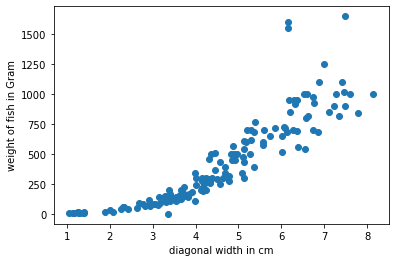

In [52]:
y = df.Weight.values.reshape(-1,1)
x = df.Width.values.reshape(-1,1)

plt.scatter(x,y)
plt.ylabel("weight of fish in Gram")
plt.xlabel("diagonal width in cm")

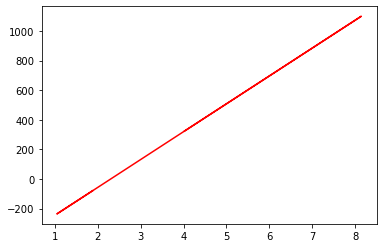

Predict weight of fish in 800 Gram:  [[150165.58496564]]


In [53]:
lr = LinearRegression()
lr.fit(x,y)
y_head = lr.predict(x)

plt.plot(x,y_head, color="red", label="linear")
plt.show()
print("Predict weight of fish in 800 Gram: ", lr.predict([[800]]))

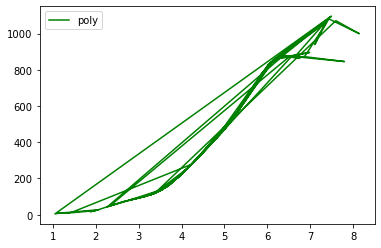

In [54]:
polynomial_regression = PolynomialFeatures(degree = 15)
x_polynomial = polynomial_regression.fit_transform(x)


linear_regression2 = LinearRegression()
linear_regression2.fit(x_polynomial,y)

y_head2 = linear_regression2.predict(x_polynomial)

plt.plot(x,y_head2,color="green",label="poly")
plt.legend()
plt.show()

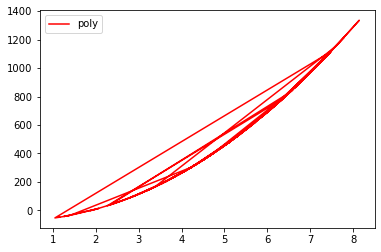

In [55]:
polynomial_regression = PolynomialFeatures(degree = 2) 
x_polynomial = polynomial_regression.fit_transform(x)


linear_regression2 = LinearRegression()
linear_regression2.fit(x_polynomial,y)

y_head2 = linear_regression2.predict(x_polynomial)

plt.plot(x,y_head2,color="red",label="poly")
plt.legend()
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


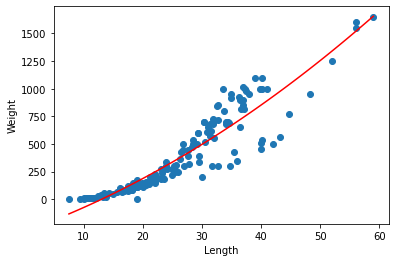

In [56]:
X = df[['Length1']]
y = df['Weight']
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_pred_poly = poly.transform(X_pred)
y_pred = model.predict(X_pred_poly)
plt.scatter(X, y)
plt.plot(X_pred, y_pred, color='red')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [57]:
df = df.rename(columns={'Length1':'VerticalLen','Length2':'DiagonalLen','Length3':'CrossLen'})
df.head()


,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [58]:
df.corr()

,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
VerticalLen,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
DiagonalLen,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
CrossLen,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


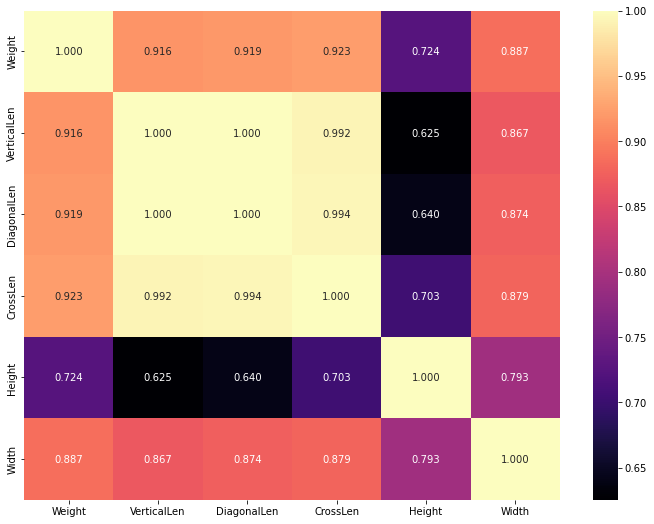

In [59]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot = True, cmap='magma',fmt='.3f')
plt.show()

In [60]:
df = df.drop(['Species','VerticalLen','DiagonalLen','Height','Width'], axis=1)
df.head(3)

,Weight,CrossLen
0,242.0,30.0
1,290.0,31.2
2,340.0,31.1


In [61]:
df.isnull().sum()


Weight      0
CrossLen    0
dtype: int64

In [62]:
#Check Duplicate Value
print("Before drop duplicate data :")
df.count()

Before drop duplicate data :


Weight      159
CrossLen    159
dtype: int64

In [63]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (5, 2)


In [64]:
duplicate_rows_df = df[df.duplicated(keep=False)]
print(duplicate_rows_df)

     Weight  CrossLen
7     390.0      35.0
9     500.0      36.2
11    500.0      36.2
14    600.0      37.2
15    600.0      37.2
16    700.0      38.3
54    390.0      35.0
86    120.0      23.5
87    120.0      23.5
113   700.0      38.3


In [65]:
df = df.drop_duplicates()

In [66]:
print("After drop duplicate data: ")
df.count()

After drop duplicate data: 


Weight      154
CrossLen    154
dtype: int64

In [67]:
#Check Not Logic Data
df[df.Weight <= 0]

,Weight,CrossLen
40,0.0,22.8


In [68]:
df = df.drop([40])
print(df.shape)

(153, 2)


In [69]:
#Model Creation
X = np.array(df.iloc[:,1])
y = np.array(df.iloc[:,0])

In [70]:
X_train = X[:80]
y_train = y[:80]

X_test = X[80:]
y_test = y[80:]

In [71]:
#Linear Regression
import matplotlib.pyplot as plt
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, X_train))

In [72]:
for i in range(20):
  print((X_test[i], y_test[i]), myfunc(X_test[i]))

(22.5, 125.0) 134.71173958153202
(22.8, 130.0) 143.96656653738785
(23.5, 120.0) 165.5611627677182
(23.5, 130.0) 165.5611627677182
(23.5, 135.0) 165.5611627677182
(23.5, 110.0) 165.5611627677182
(24.0, 130.0) 180.98587436081118
(24.0, 150.0) 180.98587436081118
(24.2, 145.0) 187.15575899804844
(24.5, 150.0) 196.41058595390427
(25.0, 170.0) 211.83529754699737
(25.5, 225.0) 227.26000914009035
(25.5, 145.0) 227.26000914009035
(26.2, 188.0) 248.8546053704207
(26.5, 180.0) 258.10943232627653
(27.0, 197.0) 273.5341439193696
(28.0, 218.0) 304.3835671055557
(28.7, 300.0) 325.97816333588594
(28.9, 260.0) 332.1480479731232
(28.9, 265.0) 332.1480479731232


In [73]:
scoreLinear = r
print("R2 Score of Linear Regression Model :")
scoreLinear

R2 Score of Linear Regression Model :


0.9510129890706698

In [74]:
#Polynomial Regression
mymodel2 = np.poly1d(np.polyfit(X_train, y_train, 3))

myline = np.linspace(0,50)

In [75]:
from sklearn.metrics import r2_score

scorePoly = r2_score(y_train, mymodel2(X_train))
print("R2 Score of Polynomial Regression Model :")
scorePoly

R2 Score of Polynomial Regression Model :


0.967261951105314

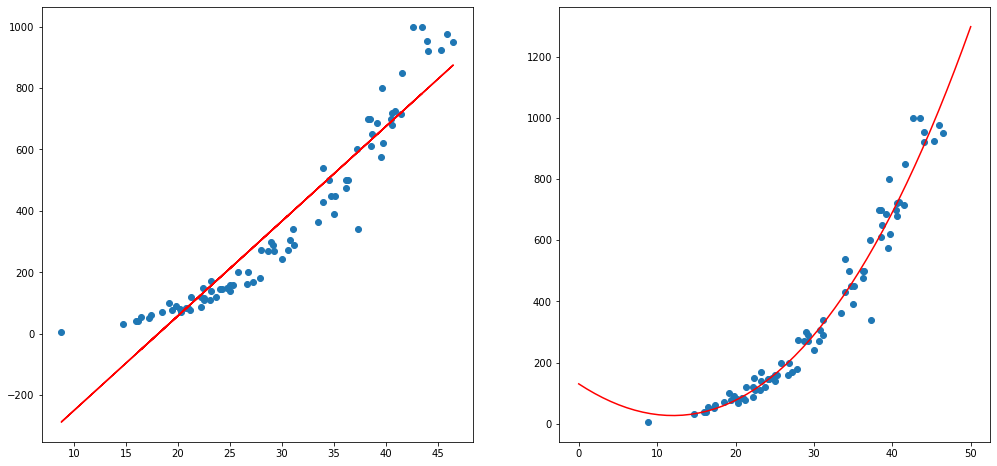

In [76]:
#Comparison of Linear and Polynomial Regression
plt.figure(figsize=(17,8))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train)
plt.plot(X_train, mymodel, color='red')

plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train)
plt.plot(myline, mymodel2(myline), color='red')
plt.show()